In [36]:
#Mount My Google Drive for Data Access
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
import pandas as pd #visualization or array processing

Mounted at /content/gdrive


In [37]:

# Read the Dataset
df = pd.read_csv('/content/gdrive/MyDrive/XGBoost_task/sim_interview_dataset.csv', sep=',', header=None)

# Use the first row as column names and then drop the first row
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)


In [38]:
# Encode categorical variables as numeric values:
# 'sex': M → 1, F → 0
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

# 'location': Rural → 1, Urban → 2, Hospital → 3
df['location'] =df['location'].map({'Rural': 1, 'Urban': 2, 'Hospital': 3})

# **Basic descriptive statistics of feature**

In [39]:
# Create a copy of the DataFrame to avoid modifying the original data
df_stat = df.copy()

# Ensure 'df_stat' is numeric
df_stat = df_stat.apply(pd.to_numeric, errors='coerce')

# Basic descriptive statistics with valid/missing counts
stats = pd.DataFrame({
    'Valid': df_stat.notna().sum(),
    'Missing': df_stat.isna().sum(),
    'Mean': df_stat.mean(),
    'Std Dev': df_stat.std(),
    'Min': df_stat.min(),
    'Max': df_stat.max()
})

# Optional: round for neatness
stats = stats.round(2)

# Display
print(stats)

                              Valid  Missing    Mean  Std Dev   Min    Max
0                                                                         
days_in_hospital              18989     1011   15.09     8.61   0.0   30.0
age                           19050      950   14.93     8.71   0.0   30.0
sex                           19015      985    0.49     0.50   0.0    1.0
previous_amr                  18967     1033    0.31     0.46   0.0    1.0
days_of_previous_antibiotics  18988     1012   14.94     8.67   0.0   30.0
last_blood_test               18962     1038    4.97     2.89   0.0   10.0
location                      19057      943    2.00     0.82   1.0    3.0
temperature                   19039      961   36.51     1.45  34.0   39.0
heart_rate                    18996     1004  104.98    26.04  60.0  150.0
resp_rate                     19045      955   19.06     6.35   8.0   30.0
sbp                           19016      984  120.01    23.12  80.0  160.0
outcome                  

In [40]:
# Create a cleaned DataFrame by dropping any rows that contain missing values
df_clean = df.dropna()

In [ ]:
!pip install ptitprince


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ptitprince: filename=ptitprince-0.3.1-py3-none-any.whl size=16216 sha256=e3dfb22d38e63fe9a2ec1811aa619073a5ef0b26ce06ff590965839f073b2eb8
  Stored in directory: /root/.cache/pip/wheels/5d/79/49/b89a41fd3d8780ce2c21c7f2debe45f3c6b08d8aef400e3df1
Successfully built ptitprince


# **Box Plot Comparing the distribution of various features between outcome groups (0 and 1)**

/usr/local/lib/python3.12/dist-packages/ptitprince/PtitPrince.py:1070: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/ptitprince/PtitPrince.py:1070: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/ptitprince/PtitPrince.py:1070: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/ptitprince/PtitPrince.py:1070: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

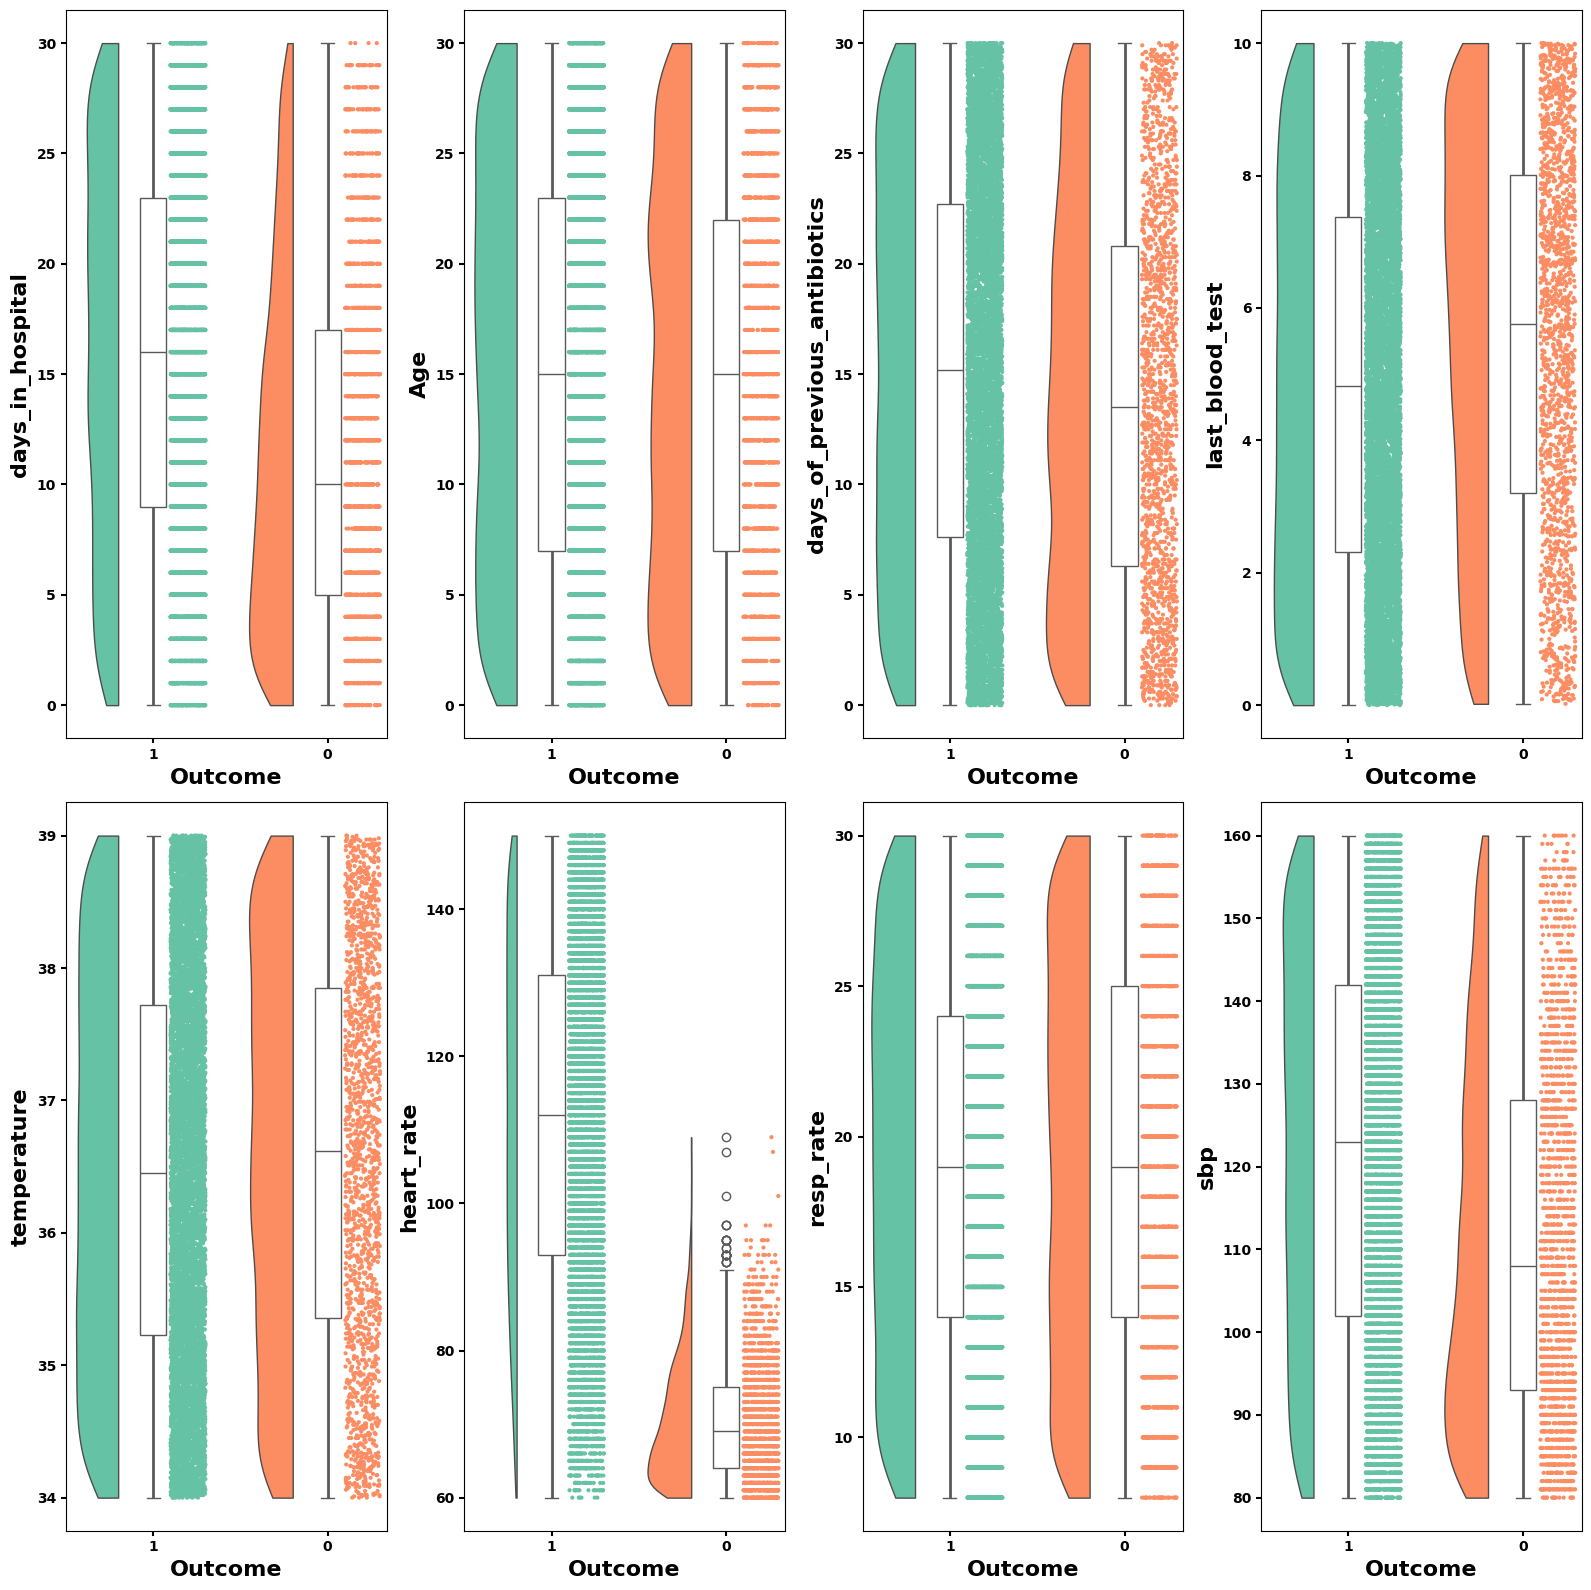

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ptitprince as pt


# Create a copy of the cleaned DataFrame to avoid modifying the original data
df_clean_copy = df_clean.copy()
# Ensure 'days_in_hospital' is numeric; non-numeric values are converted to NaN
df_clean_copy['days_in_hospital'] = pd.to_numeric(df_clean_copy['days_in_hospital'], errors='coerce')

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 16))  # 2 rows, 4 columns

# Plot in the first subplot [row 0, col 0]
ax = axes[0, 0]

# Generate a Raincloud plot to visualize the distribution of days_in_hospital by outcome
pt.RainCloud(
    x='outcome',
    y='days_in_hospital',
    data=df_clean_copy,
    ax=axes[0, 0],     # Plot in the first subplot [row 0, col 0]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)

# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('days_in_hospital', fontsize=16, fontweight='bold')

plt.tight_layout()

# Display the plot
#plt.show()

# Ensure 'age' is numeric; non-numeric values are converted to NaN
df_clean_copy['age'] = pd.to_numeric(df_clean_copy['age'], errors='coerce')

# Generate a Raincloud plot to visualize the distribution of age use by outcome
pt.RainCloud(
    x='outcome',
    y='age',
    data=df_clean_copy,
    ax=axes[0, 1],     # Plot in the first subplot [row 0, col 1]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)

ax = axes[0, 1]
# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('Age', fontsize=16, fontweight='bold')

plt.tight_layout()


# Ensure 'days_of_previous_antibiotics' is numeric; non-numeric values are converted to NaN
df_clean_copy['days_of_previous_antibiotics'] = pd.to_numeric(df_clean_copy['days_of_previous_antibiotics'], errors='coerce')

# Generate a Raincloud plot to visualize the distribution of days_of_previous_antibiotics use by outcome
pt.RainCloud(
    x='outcome',
    y='days_of_previous_antibiotics',
    data=df_clean_copy,
    ax=axes[0, 2],     # Plot in the first subplot [row 0, col 2]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)
ax=axes[0, 2]
# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('days_of_previous_antibiotics', fontsize=16, fontweight='bold')

plt.tight_layout()

# Ensure 'last_blood_test' is numeric; non-numeric values are converted to NaN
df_clean_copy['last_blood_test'] = pd.to_numeric(df_clean_copy['last_blood_test'], errors='coerce')

# Generate a Raincloud plot to visualize the distribution of days_of_previous_antibiotics use by outcome
pt.RainCloud(
    x='outcome',
    y='last_blood_test',
    data=df_clean_copy,
    ax=axes[0, 3],     # Plot in the first subplot [row 0, col 3]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)
ax=axes[0, 3]
# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('last_blood_test', fontsize=16, fontweight='bold')

plt.tight_layout()

# Ensure 'temperature' is numeric; non-numeric values are converted to NaN
df_clean_copy['temperature'] = pd.to_numeric(df_clean_copy['temperature'], errors='coerce')

# Generate a Raincloud plot to visualize the distribution of days_of_previous_antibiotics use by outcome
pt.RainCloud(
    x='outcome',
    y='temperature',
    data=df_clean_copy,
    ax=axes[1, 0],     # Plot in the first subplot [row 0, col 3]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)
ax=axes[1,0]
# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('temperature', fontsize=16, fontweight='bold')

plt.tight_layout()

# Ensure 'heart_rate' is numeric; non-numeric values are converted to NaN
df_clean_copy['heart_rate'] = pd.to_numeric(df_clean_copy['heart_rate'], errors='coerce')

# Generate a Raincloud plot to visualize the distribution of days_of_previous_antibiotics use by outcome
pt.RainCloud(
    x='outcome',
    y='heart_rate',
    data=df_clean_copy,
    ax=axes[1, 1],     # Plot in the first subplot [row 0, col 3]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)
ax=axes[1,1]
# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('heart_rate', fontsize=16, fontweight='bold')

plt.tight_layout()


# Ensure 'resp_rate' is numeric; non-numeric values are converted to NaN
df_clean_copy['resp_rate'] = pd.to_numeric(df_clean_copy['resp_rate'], errors='coerce')

# Generate a Raincloud plot to visualize the distribution of days_of_previous_antibiotics use by outcome
pt.RainCloud(
    x='outcome',
    y='resp_rate',
    data=df_clean_copy,
    ax=axes[1, 2],     # Plot in the first subplot [row 0, col 3]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)
ax=axes[1,2]
# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('resp_rate', fontsize=16, fontweight='bold')

plt.tight_layout()


# Ensure 'sbp' is numeric; non-numeric values are converted to NaN
df_clean_copy['sbp'] = pd.to_numeric(df_clean_copy['sbp'], errors='coerce')

# Generate a Raincloud plot to visualize the distribution of days_of_previous_antibiotics use by outcome
pt.RainCloud(
    x='outcome',
    y='sbp',
    data=df_clean_copy,
    ax=axes[1, 3],     # Plot in the first subplot [row 0, col 3]
    palette="Set2",
    bw=.2,             # bandwidth (controls smoothness of the violin)
    width_viol=.5,     # width of the violin
    orient='v',        # vertical orientation
    move=0.2           # separates distributions slightly
)
ax=axes[1,3]
# Add title and axis labels for clarity
ax.set_xlabel('Outcome', fontsize=16, fontweight='bold')
ax.set_ylabel('sbp', fontsize=16, fontweight='bold')

plt.tight_layout()


# Make tick labels bold for ALL subplots
for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=10, width=1.5)
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontweight('bold')


# **Interactive 3D plot visualizing feature relationship with outcome (Features choice - days in hospital, heart rate and Sbp)**

In [42]:
import plotly.express as px

df_clean_3dplot = df_clean.copy()
df_clean_3dplot['days_in_hospital'] = pd.to_numeric(df_clean_3dplot['days_in_hospital'], errors='coerce')
df_clean_3dplot['heart_rate'] = pd.to_numeric(df_clean_3dplot['heart_rate'], errors='coerce')
df_clean_3dplot['sbp'] = pd.to_numeric(df_clean_3dplot['sbp'], errors='coerce')

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))

# Interactive 3D scatter plot
fig = px.scatter_3d(
    df_clean_3dplot,
    x='days_in_hospital', y='heart_rate', z='sbp',
    color='outcome',
    color_continuous_scale='RdBu',
    symbol='outcome',
    opacity=1,
    title='3D Scatter: Days in Hospital, Heart Rate, SBP vs Outcome'
)

# Make interactive
fig.update_traces(marker=dict(size=2, line=dict(width=1, color='DarkSlateGrey')))

# Update axes, title, and legend fonts for presentation quality
fig.update_layout(
    scene=dict(
        xaxis=dict(
            title='Days in Hospital',
            titlefont=dict(size=18, family='Arial, bold'),
            tickfont=dict(size=14, family='Arial, bold')
        ),
        yaxis=dict(
            title='Heart Rate',
            titlefont=dict(size=18, family='Arial, bold'),
            tickfont=dict(size=14, family='Arial, bold')
        ),
        zaxis=dict(
            title='SBP',
            titlefont=dict(size=18, family='Arial, bold'),
            tickfont=dict(size=14, family='Arial, bold')
        ),
    ),
    legend=dict(
        title='Outcome',        # Legend title
        title_font=dict(size=18),  # Title font size
        font=dict(size=16),        # Legend label font size
        itemsizing='constant',     # Keeps marker size consistent
        bgcolor='rgba(255,255,255,0.5)',  # Optional: semi-transparent background
    ),
    title_font=dict(size=20, family='Arial, bold'),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()




<Figure size 1000x800 with 0 Axes>

In [43]:
df_clean['outcome'].value_counts()

,count
outcome,
1,9610
0,1769


# **Apply PCA for feature visualization examing class seperability**

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import plotly.express as px


# Create a copy of the cleaned DataFrame to avoid modifying the original data
df_clean_PCA = df_clean.copy()

# Separate features and outcome
Data_X = df_clean_PCA.drop(columns=['outcome'])
Data_y = df_clean_PCA['outcome']

# Standardize the data
scaler = StandardScaler()
Data_X_scaled = scaler.fit_transform(Data_X)

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
Data_X_PCA = pca.fit_transform(Data_X_scaled)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=Data_X_PCA, columns=['PC1', 'PC2', 'PC3'])
pca_df['outcome'] = Data_y.values

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))

# Interactive 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color='outcome',
    color_continuous_scale='RdBu',
    symbol='outcome',
    opacity=1
)

# Make the layout cleaner
fig.update_traces(marker=dict(size=2))
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    title_font=dict(size=18, color='black', family='Arial'),
)

fig.show()


<Figure size 1000x800 with 0 Axes>

In [20]:
!pip install umap-learn

## **Apply UMAP for feature visualization examing class seperability**

In [45]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import plotly.express as px


# Create a copy of the cleaned DataFrame to avoid modifying the original data
df_clean_UMAP = df_clean.copy()

# Separate features and outcome
Data_X = df_clean_UMAP.drop(columns=['outcome'])
Data_y = df_clean_UMAP['outcome']

# Standardize the data
scaler = StandardScaler()
Data_X_scaled = scaler.fit_transform(Data_X)

# Apply UMAP in 3D
umap_model = umap.UMAP(
    n_components=3,
    n_neighbors=50,
    min_dist=0.5,
    metric='cosine',
    random_state=42
)
X_umap = umap_model.fit_transform(Data_X_scaled)


# Create DataFrame for visualization
UMAP_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2', 'UMAP3'])
UMAP_df['outcome'] = Data_y.values


# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))

# Interactive 3D scatter plot
fig = px.scatter_3d(
    UMAP_df,
    x='UMAP1', y='UMAP2', z='UMAP3',
    color='outcome',
    color_continuous_scale='RdBu',
    symbol='outcome',
    opacity=0.8
)

# Reduce marker size
fig.update_traces(marker=dict(size=2))

# Improve layout
fig.update_layout(
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2',
        zaxis_title='UMAP Dimension 3'
    ),
    title_font=dict(size=18, color='black', family='Arial'),
)

fig.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



<Figure size 1000x800 with 0 Axes>

## **Apply t-SNE for feature visualization examing class seperability**





In [46]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import plotly.express as px

df_sample = df_clean.sample(n=5000, random_state=42)

# Create a copy of the cleaned DataFrame to avoid modifying the original data
df_clean_TSNE = df_sample.copy()

# Separate features and outcome
Data_X = df_clean_TSNE.drop(columns=['outcome'])
Data_y = df_clean_TSNE['outcome']

# Standardize the data
scaler = StandardScaler()
Data_X_scaled = scaler.fit_transform(Data_X)


# Apply t-SNE (3D)
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(Data_X_scaled)

# Create DataFrame for visualization
TSNE_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2', 'Dim3'])
TSNE_df['outcome'] = Data_y.values


# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))

# Interactive 3D scatter plot
fig = px.scatter_3d(
    TSNE_df,
    x='Dim1', y='Dim2', z='Dim3',
    color='outcome',
    color_continuous_scale='RdBu',
    symbol='outcome',
    opacity=0.8
)


# Reduce marker size
fig.update_traces(marker=dict(size=2))

# Improve layout
fig.update_layout(
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    ),
    title_font=dict(size=18, color='black', family='Arial'),
)

fig.show()

<Figure size 1000x800 with 0 Axes>

## **Optimize XGBoost hyperparameters using randomized search with stratified cross-validation.**

In [47]:
# Import libraries
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
import pandas as pd
import numpy as np

# Create a copy of the cleaned DataFrame to avoid modifying the original data
df_clean_Model = df_clean.copy()

# Ensure values in 'df_clean_Model' is numeric; non-numeric values are converted to NaN
df_clean_Model = df_clean_Model.apply(pd.to_numeric, errors='coerce')


# Separate features and outcome
X = df_clean_Model.drop(columns=['outcome'])
y = df_clean_Model['outcome']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model Initialization
# Initialize an XGBoost classifier for binary classification
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    verbose=1  # shows boosting round progres
)

# Parameter search space for RandomizedSearchCV; for every key values define sampling distributions
param_grid = {
    'n_estimators': randint(200, 600),        # broader, continuous-like sampling
    'max_depth': randint(3, 8),               # smaller trees to moderate depth
    'learning_rate': uniform(0.01, 0.09),     # samples in [0.01, 0.1]
    'subsample': uniform(0.6, 0.4),           # samples in [0.6, 1.0]
    'colsample_bytree': uniform(0.6, 0.4),    # samples in [0.6, 1.0]
    'gamma': uniform(0, 0.4),                 # samples in [0, 0.4]
    'min_child_weight': randint(1, 6)         # discrete 1–5 range
}

# Use StratifiedKFold to preserve class distribution across folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search over the hyperparameter space
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,  # test 50 random combinations (you control this!)
    scoring='balanced_accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model to the training data while performing randomized search
random_search.fit(X_train, y_train)

# Best parameter combination of hyperparameters and corresponding cross-validation balanced-accuracy
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Store the cross-validation result and subsequently sorting it
results = pd.DataFrame(random_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[18:43:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder", "verbose" } are not used.




Best Parameters: {'colsample_bytree': np.float64(0.9637281608315128), 'gamma': np.float64(0.10351199264000677), 'learning_rate': np.float64(0.06962700559185837), 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 459, 'subsample': np.float64(0.6739417822102108)}
Best CV Accuracy: 0.9225776046011696


## **Evaluate the optimized model on test data with confusion matrix, classification report, and balanced accuracy.**

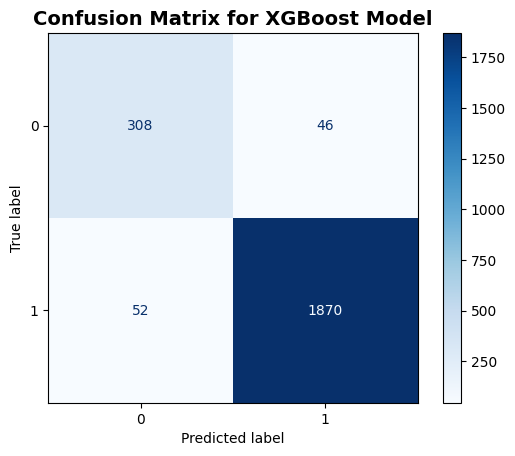

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       354
           1       0.98      0.97      0.97      1922

    accuracy                           0.96      2276
   macro avg       0.92      0.92      0.92      2276
weighted avg       0.96      0.96      0.96      2276

Balanced Accuracy: 0.9215


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,balanced_accuracy_score

# Stratified split of data into training and testing ensuring
#both sets maintain the same class distribution as the original dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Retrieve the best hyperparameters obtained from the RandomizedSearchCV
best_params = random_search.best_params_

# Initialize the final XGBoost model using the optimized parameters
final_model = XGBClassifier(
    **best_params,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

#Fit the final model on the training data
final_model.fit(X_train, y_train)

# Predict the unseen test data
y_pred = final_model.predict(X_test)

# Confusion Matrix evaluating the performance
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for XGBoost Model', fontsize=14, fontweight='bold')
plt.show()

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

# Calculate the balanced accuracy — accounts for class imbalance by averaging recall per class
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {bal_acc:.4f}")

# **Estimate model performance using repeated stratified cross-validation with 95% confidence interval.**

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

# 5-fold CV repeated 10 times for robust performance estimation - 80/20 Train-Test
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Compute balanced accuracy scores across folds
scores = cross_val_score(final_model, X, y, cv=cv, scoring='balanced_accuracy')

# Calculate mean, standard deviation, and 95% confidence interval
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
ci_lower = mean_accuracy - 1.96 * std_accuracy / np.sqrt(len(scores))
ci_upper = mean_accuracy + 1.96 * std_accuracy / np.sqrt(len(scores))

print(f"BALANCED ACCURACY: {mean_accuracy:.3f} ± {std_accuracy:.3f}")
print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")

BALANCED ACCURACY: 0.920 ± 0.008
95% CI: [0.918, 0.922]


## **Plot of balanced accuracy scores with mean and 95% confidence interval**

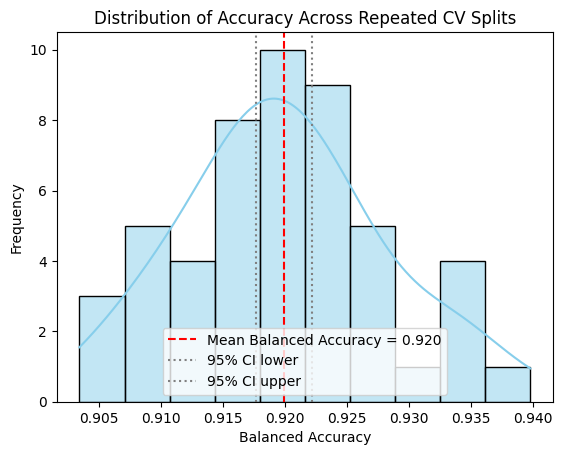

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with KDE curve showing score distribution
sns.histplot(scores, kde=True, bins=10, color='skyblue')

# Add vertical lines for mean and 95% confidence interval
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f"Mean Balanced Accuracy = {mean_accuracy:.3f}")
plt.axvline(ci_lower, color='gray', linestyle=':', label='95% CI lower')
plt.axvline(ci_upper, color='gray', linestyle=':', label='95% CI upper')
plt.legend()
plt.title("Distribution of Accuracy Across Repeated CV Splits")
plt.xlabel("Balanced Accuracy")
plt.ylabel("Frequency")
plt.show()

## **To understand which variables most strongly influence the XGBoost predictions, top 12 features ranked by gain-based importance was visualized.**

<Figure size 1000x800 with 0 Axes>

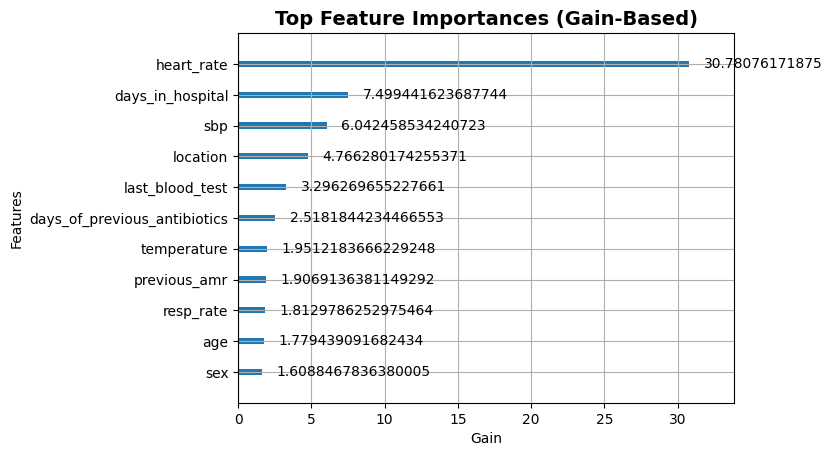

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot top 12 most important features based on gain from the trained XGBoost model
plot_importance(final_model, importance_type='gain', max_num_features=12)
plt.title("Top Feature Importances (Gain-Based)", fontsize=14, fontweight='bold')
plt.xlabel("Gain")
plt.ylabel("Features")
plt.show()